In [1]:
import sys
sys.path.append('../src')
from modules import *

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv('../../data/solubility_features.csv', index_col=0)

In [3]:
target_name = "Solubility"
target = data[target_name]
target

0      -3.616127
1      -4.662065
2      -3.286116
3      -2.664549
4      -4.595503
          ...   
3346   -3.370000
3347   -4.500000
3348   -3.010000
3349   -2.930000
3350   -3.980000
Name: Solubility, Length: 3351, dtype: float64

In [4]:
data = data.drop(columns=[target_name,'smiles', 'mol'])
data.head()

,logp,molwt,balabanj,tpsa,0,1,2,3,4,5,...,1011,1012,1013,1014,1015,1017,1019,1020,1021,1022
0,6.9541,312.606,2.998602,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.4854,422.525,1.084427,56.60,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2.6775,170.252,2.145839,37.30,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.5284,376.449,1.776978,115.06,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,3.4972,342.391,1.447050,61.83,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=42, test_size=0.25
)

In [6]:
data_train.describe()

,logp,molwt,balabanj,tpsa,0,1,2,3,4,5,...,1011,1012,1013,1014,1015,1017,1019,1020,1021,1022
count,2513.000000,2513.000000,2513.000000,2513.000000,2513.000000,2513.000000,2513.000000,2513.000000,2513.000000,2513.000000,...,2513.000000,2513.000000,2513.000000,2513.000000,2513.000000,2513.000000,2513.000000,2513.000000,2513.000000,2513.000000
mean,3.014989,298.585649,2.637012,60.803908,0.016713,0.325507,0.058894,0.026263,0.122563,0.023478,...,0.010744,0.011540,0.012734,0.020294,0.016713,0.140470,0.328293,0.018703,0.011142,0.028651
std,2.850893,145.854948,0.900792,47.301138,0.128220,0.468657,0.235473,0.159950,0.328000,0.151446,...,0.103116,0.106824,0.112146,0.141034,0.128220,0.347543,0.469685,0.135500,0.104987,0.166857
min,-17.406400,92.141000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.501100,199.382000,1.957189,26.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.722800,275.348000,2.493171,52.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.113400,355.453000,3.153178,78.430000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,26.246600,1297.128000,7.517310,633.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data_train)

StandardScaler()

In [13]:
from sklearn.model_selection import ShuffleSplit, cross_validate

In [14]:
scaler = StandardScaler().set_output(transform="pandas")
data_train_scaled = scaler.fit_transform(data_train)
data_train_scaled.describe()

,logp,molwt,balabanj,tpsa,0,1,2,3,4,5,...,1011,1012,1013,1014,1015,1017,1019,1020,1021,1022
count,2.513000e+03,2.513000e+03,2.513000e+03,2.513000e+03,2513.000000,2.513000e+03,2.513000e+03,2.513000e+03,2.513000e+03,2.513000e+03,...,2.513000e+03,2.513000e+03,2.513000e+03,2.513000e+03,2.513000e+03,2.513000e+03,2.513000e+03,2513.000000,2.513000e+03,2.513000e+03
mean,-6.785923e-17,2.247837e-16,1.717687e-16,7.068670e-17,0.000000,2.862811e-17,4.241202e-18,-2.544721e-17,-3.958455e-17,3.746395e-17,...,3.110215e-17,-1.272361e-17,-3.958455e-17,-4.241202e-18,-4.241202e-18,1.979228e-17,-1.555107e-17,0.000000,2.120601e-18,-2.827468e-17
std,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,...,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199,1.000199e+00,1.000199e+00
min,-7.164581e+00,-1.415692e+00,-2.928020e+00,-1.285720e+00,-0.130373,-6.946912e-01,-2.501585e-01,-1.642309e-01,-3.737413e-01,-1.550561e-01,...,-1.042153e-01,-1.080496e-01,-1.135695e-01,-1.439266e-01,-1.303732e-01,-4.042597e-01,-6.991023e-01,-0.138055,-1.061490e-01,-1.717443e-01
25%,-5.311283e-01,-6.802882e-01,-7.548444e-01,-7.295971e-01,-0.130373,-6.946912e-01,-2.501585e-01,-1.642309e-01,-3.737413e-01,-1.550561e-01,...,-1.042153e-01,-1.080496e-01,-1.135695e-01,-1.439266e-01,-1.303732e-01,-4.042597e-01,-6.991023e-01,-0.138055,-1.061490e-01,-1.717443e-01
50%,-1.025106e-01,-1.593520e-01,-1.597144e-01,-1.734745e-01,-0.130373,-6.946912e-01,-2.501585e-01,-1.642309e-01,-3.737413e-01,-1.550561e-01,...,-1.042153e-01,-1.080496e-01,-1.135695e-01,-1.439266e-01,-1.303732e-01,-4.042597e-01,-6.991023e-01,-0.138055,-1.061490e-01,-1.717443e-01
75%,3.853635e-01,3.899674e-01,5.731277e-01,3.727099e-01,-0.130373,1.439488e+00,-2.501585e-01,-1.642309e-01,-3.737413e-01,-1.550561e-01,...,-1.042153e-01,-1.080496e-01,-1.135695e-01,-1.439266e-01,-1.303732e-01,-4.042597e-01,1.430406e+00,-0.138055,-1.061490e-01,-1.717443e-01
max,8.150511e+00,6.847495e+00,5.418866e+00,1.210351e+01,7.670289,1.439488e+00,3.997465e+00,6.088987e+00,2.675648e+00,6.449281e+00,...,9.595524e+00,9.255008e+00,8.805183e+00,6.947986e+00,7.670289e+00,2.473657e+00,1.430406e+00,7.243486,9.420722e+00,5.822609e+00


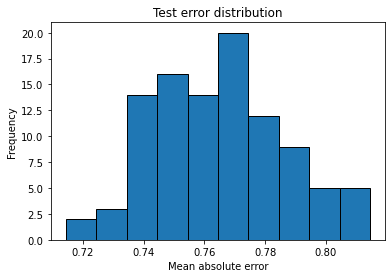

In [15]:
model = xgb.XGBRegressor(n_estimators=103, learning_rate=0.15, max_depth=3)
model.fit(data, target)

cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=0)
cv_results = cross_validate(
    model, data, target, cv=cv, scoring="neg_mean_absolute_error"
)
cv_results = pd.DataFrame(cv_results)
cv_results.head()
cv_results["test_error"] = -cv_results["test_score"]
cv_results["test_error"].plot.hist(bins=10, edgecolor="black")
plt.xlabel("Mean absolute error")
_ = plt.title("Test error distribution")

In [16]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(data, target)

from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=40, test_size=0.3, random_state=0)
cv_results = cross_validate(
    regressor, data, target, cv=cv, scoring="neg_mean_absolute_error"
)

In [17]:
cv_results = pd.DataFrame(cv_results)
cv_results.head()

,fit_time,score_time,test_score
0,0.146791,0.004722,-0.999750
1,0.141757,0.004689,-0.982813
2,0.138287,0.004698,-0.939351
3,0.145768,0.004671,-0.987853
4,0.143080,0.004695,-0.973204


In [18]:
cv_results["test_error"] = -cv_results["test_score"]
cv_results.head(10)

,fit_time,score_time,test_score,test_error
0,0.146791,0.004722,-0.999750,0.999750
1,0.141757,0.004689,-0.982813,0.982813
2,0.138287,0.004698,-0.939351,0.939351
3,0.145768,0.004671,-0.987853,0.987853
4,0.143080,0.004695,-0.973204,0.973204
5,0.148717,0.004718,-1.028312,1.028312
6,0.142320,0.004689,-0.995700,0.995700
7,0.146415,0.004693,-0.934349,0.934349
8,0.145825,0.004685,-0.930614,0.930614
9,0.139647,0.004685,-0.953379,0.953379


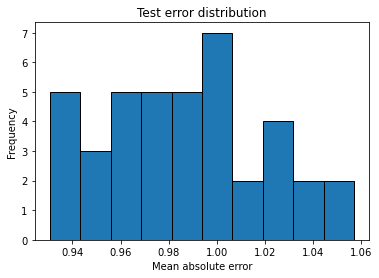

In [19]:
cv_results["test_error"].plot.hist(bins=10, edgecolor="black")
plt.xlabel("Mean absolute error")
_ = plt.title("Test error distribution")

In [20]:
print(
    "The mean cross-validated testing error is: "
    f"{cv_results['test_error'].mean():.2f}"
)

The mean cross-validated testing error is: 0.99


In [21]:
print(
    "The standard deviation of the testing error is: "
    f"{cv_results['test_error'].std():.2f}"
)

The standard deviation of the testing error is: 0.03


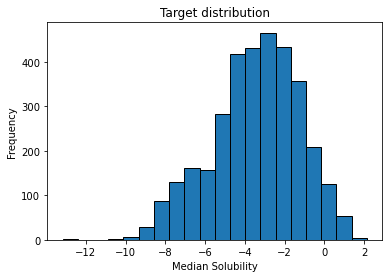

In [22]:
target.plot.hist(bins=20, edgecolor="black")
plt.xlabel("Median Solubility")
_ = plt.title("Target distribution")

In [23]:
print(f"The standard deviation of the target is: {target.std():.2f}")

The standard deviation of the target is: 2.19


In [24]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(regressor, data, target)
scores

array([0.06367225, 0.651132  , 0.51398535, 0.30837625, 0.1896186 ])

In [25]:
import pandas as pd
from sklearn.model_selection import cross_validate, ShuffleSplit

cv = ShuffleSplit(n_splits=30, test_size=0.2, random_state=0)
cv_results = cross_validate(
    regressor,
    data,
    target,
    cv=cv,
    scoring="neg_mean_absolute_error",
    return_train_score=True,
    n_jobs=2,
)
cv_results = pd.DataFrame(cv_results)

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [26]:
scores = pd.DataFrame()
scores[["train error", "test error"]] = -cv_results[
    ["train_score", "test_score"]
]

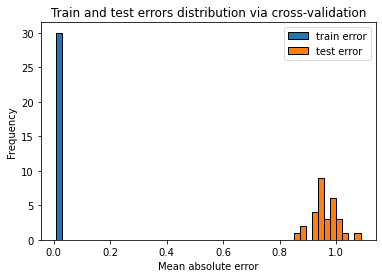

In [27]:
scores.plot.hist(bins=50, edgecolor="black")
plt.xlabel("Mean absolute error")
_ = plt.title("Train and test errors distribution via cross-validation")

CPU times: user 291 ms, sys: 83.9 ms, total: 375 ms
Wall time: 11.3 s


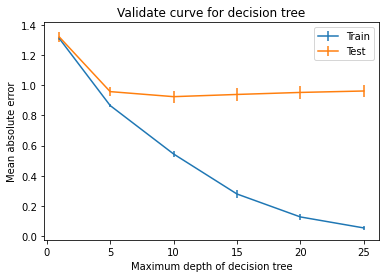

In [28]:
%%time
import numpy as np
from sklearn.model_selection import ValidationCurveDisplay

max_depth = np.array([1, 5, 10, 15, 20, 25])
disp = ValidationCurveDisplay.from_estimator(
    regressor,
    data,
    target,
    param_name="max_depth",
    param_range=max_depth,
    cv=cv,
    scoring="neg_mean_absolute_error",
    negate_score=True,
    std_display_style="errorbar",
    n_jobs=2,
)
_ = disp.ax_.set(
    xlabel="Maximum depth of decision tree",
    ylabel="Mean absolute error",
    title="Validate curve for decision tree",
)

In [29]:
train_sizes = np.linspace(0.1, 1.0, num=5, endpoint=True)
train_sizes

array([0.1  , 0.325, 0.55 , 0.775, 1.   ])

In [30]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()

In [31]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=30, test_size=0.2)

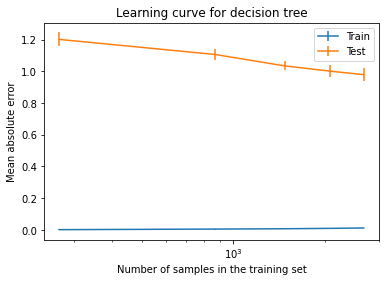

In [32]:
from sklearn.model_selection import LearningCurveDisplay

display = LearningCurveDisplay.from_estimator(
    regressor,
    data,
    target,
    train_sizes=train_sizes,
    cv=cv,
    score_type="both",  # both train and test errors
    scoring="neg_mean_absolute_error",
    negate_score=True,  # to use when metric starts with "neg_"
    score_name="Mean absolute error",
    std_display_style="errorbar",
    n_jobs=2,
)
_ = display.ax_.set(xscale="log", title="Learning curve for decision tree")